In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.data.signals_bandwidth import compute_bandwidths

In [ ]:
# Constants
SAMPLING_RATE = 1000  # Ensure this matches the value in signals_bandwidth.py

# Load the dataset
dataset_path = "/Users/kaspervanderhorst/Desktop/thesis/src/data/data_storage/composite_signals_20250512T203403.npz"
data = np.load(dataset_path)
signals = data['composite_signals']  # Shape: [n_signals, signal_length]

print(f"Loaded dataset with {signals.shape[0]} signals, each of length {signals.shape[1]}.")

Loaded dataset with 10000 signals, each of length 1000.


In [14]:
# Compute bandwidths
target_bands = 2  # Number of frequency bands to detect
sigma = 5 # Gaussian smoothing parameter
bandwidths = compute_bandwidths(signals, target_bands=target_bands, sigma=sigma)

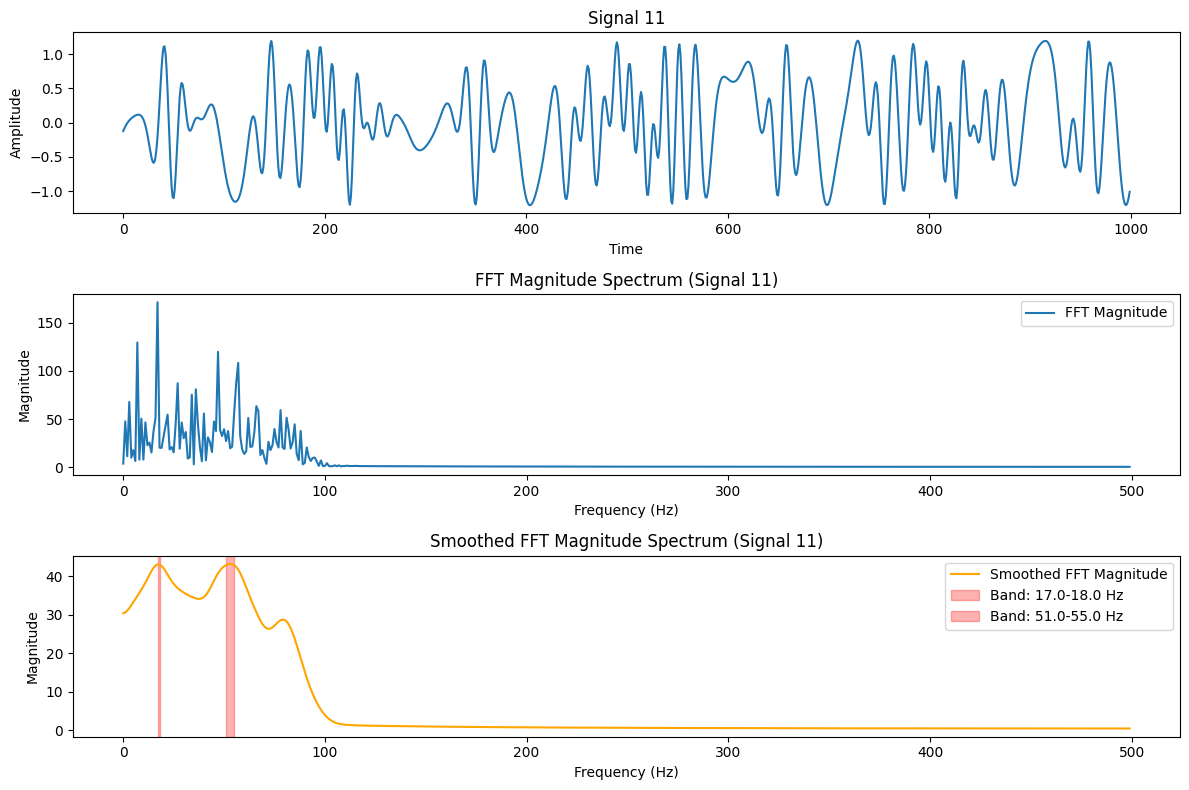

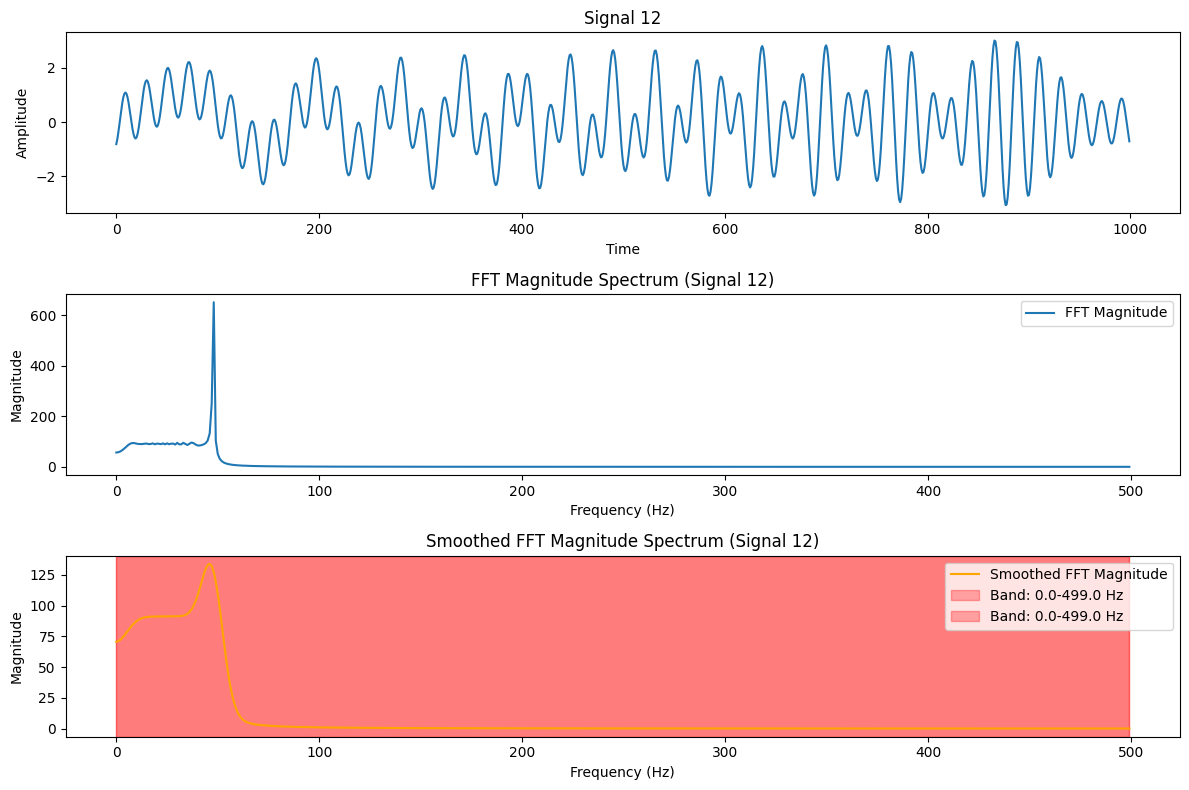

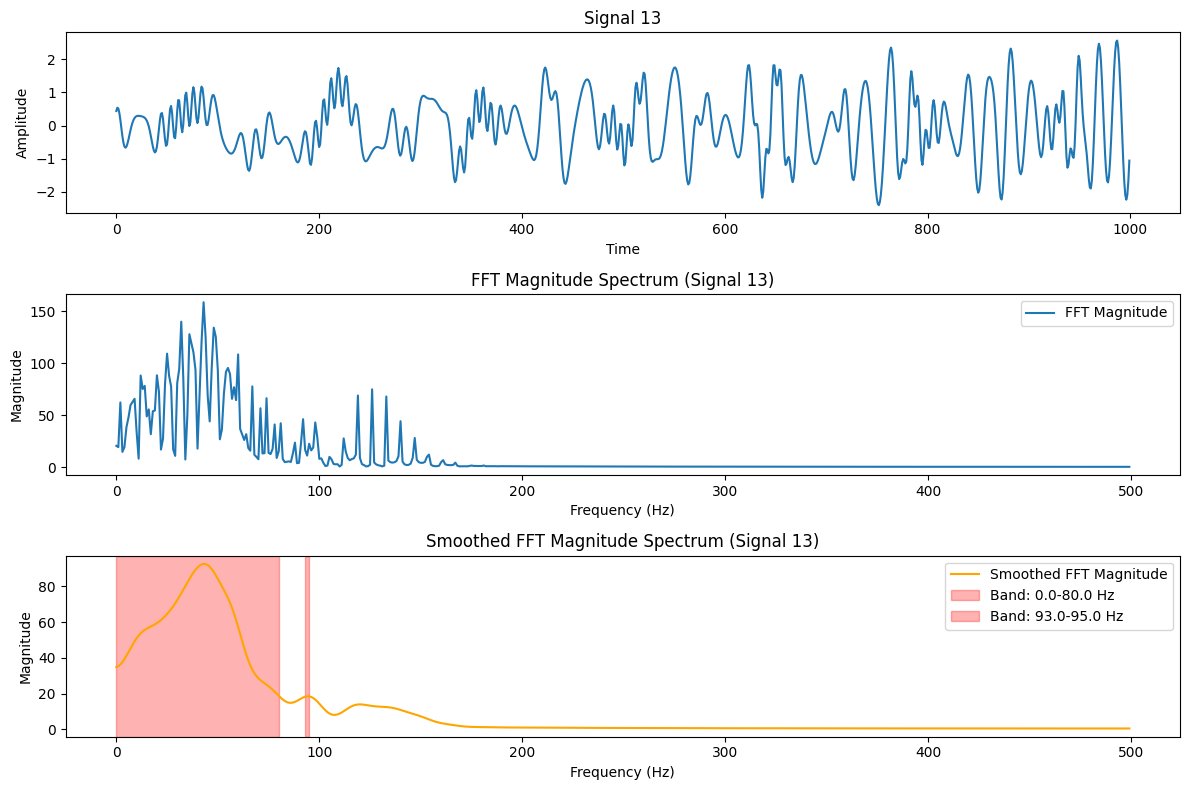

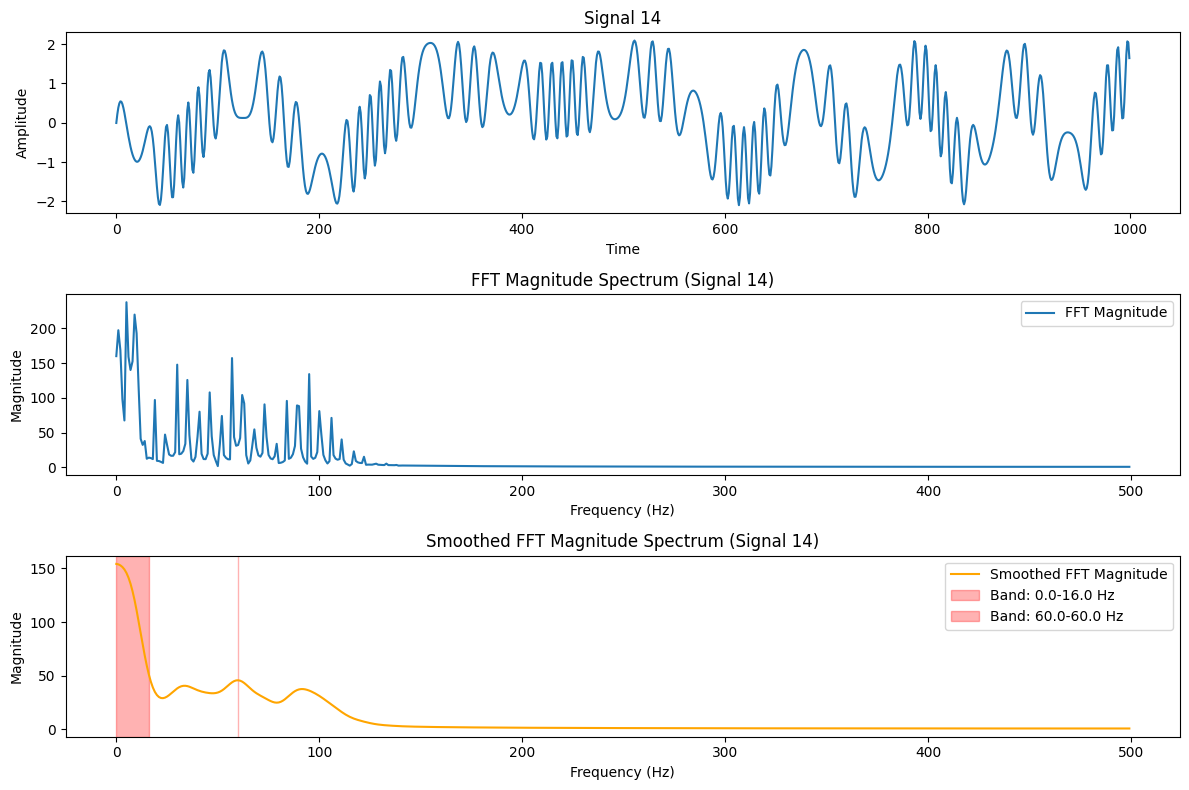

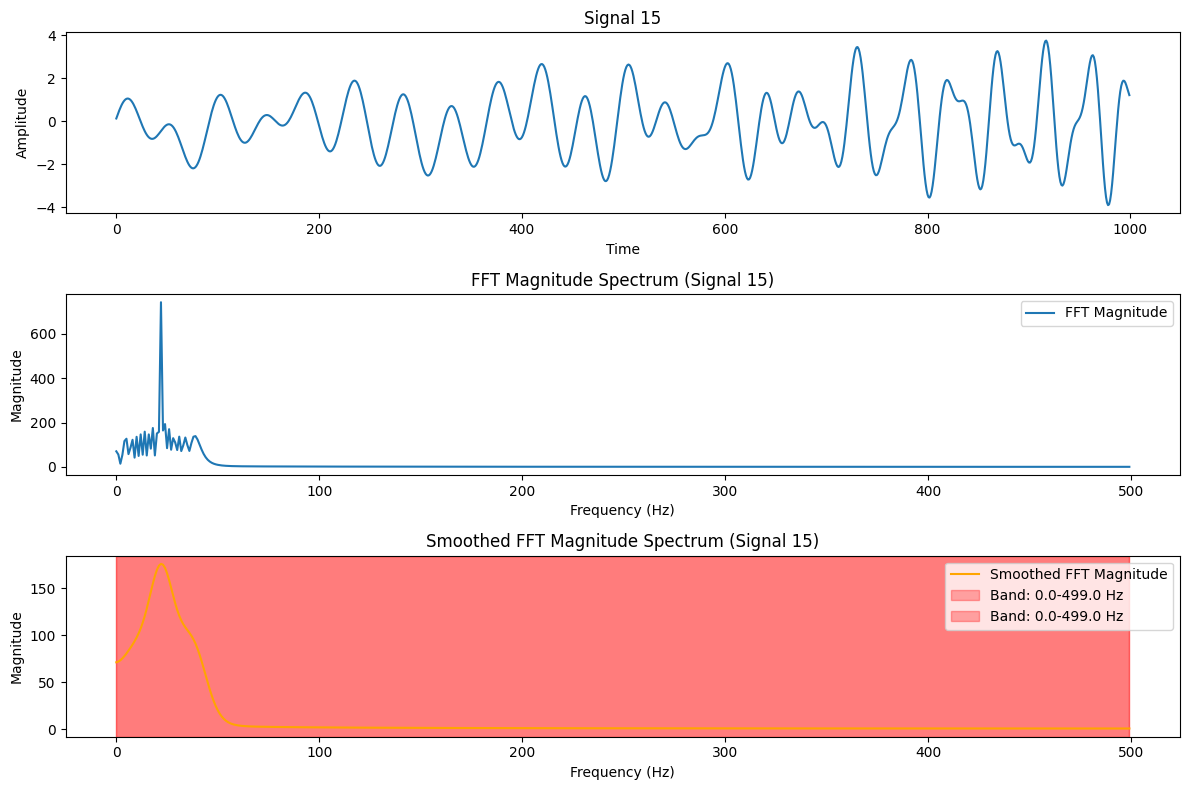

In [16]:
from scipy.ndimage import gaussian_filter1d

# Visualize the results for a selected range of signals
start_index = 10  # Start index of the range
end_index = 15   # End index of the range (exclusive)

for i in range(start_index, end_index):
    signal = signals[i]
    bands = bandwidths[i]

    # Compute FFT for visualization
    n = len(signal)
    freqs = np.fft.fftfreq(n, 1 / SAMPLING_RATE)[:n // 2]
    fft_magnitude = np.abs(np.fft.fft(signal))[:n // 2]

    # Apply Gaussian smoothing to the FFT magnitude spectrum
    smoothed_fft = gaussian_filter1d(fft_magnitude, sigma=sigma)

    # Plot the signal
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(signal)
    plt.title(f"Signal {i + 1}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    # Plot the FFT magnitude spectrum
    plt.subplot(3, 1, 2)
    plt.plot(freqs, fft_magnitude, label="FFT Magnitude")
    plt.title(f"FFT Magnitude Spectrum (Signal {i + 1})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()

    # Plot the smoothed FFT magnitude spectrum with detected bands
    plt.subplot(3, 1, 3)
    plt.plot(freqs, smoothed_fft, label="Smoothed FFT Magnitude", color="orange")
    for fmin, fmax in bands:
        plt.axvspan(fmin, fmax, color='red', alpha=0.3, label=f"Band: {fmin:.1f}-{fmax:.1f} Hz")
    plt.title(f"Smoothed FFT Magnitude Spectrum (Signal {i + 1})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()

    plt.tight_layout()
    plt.show()